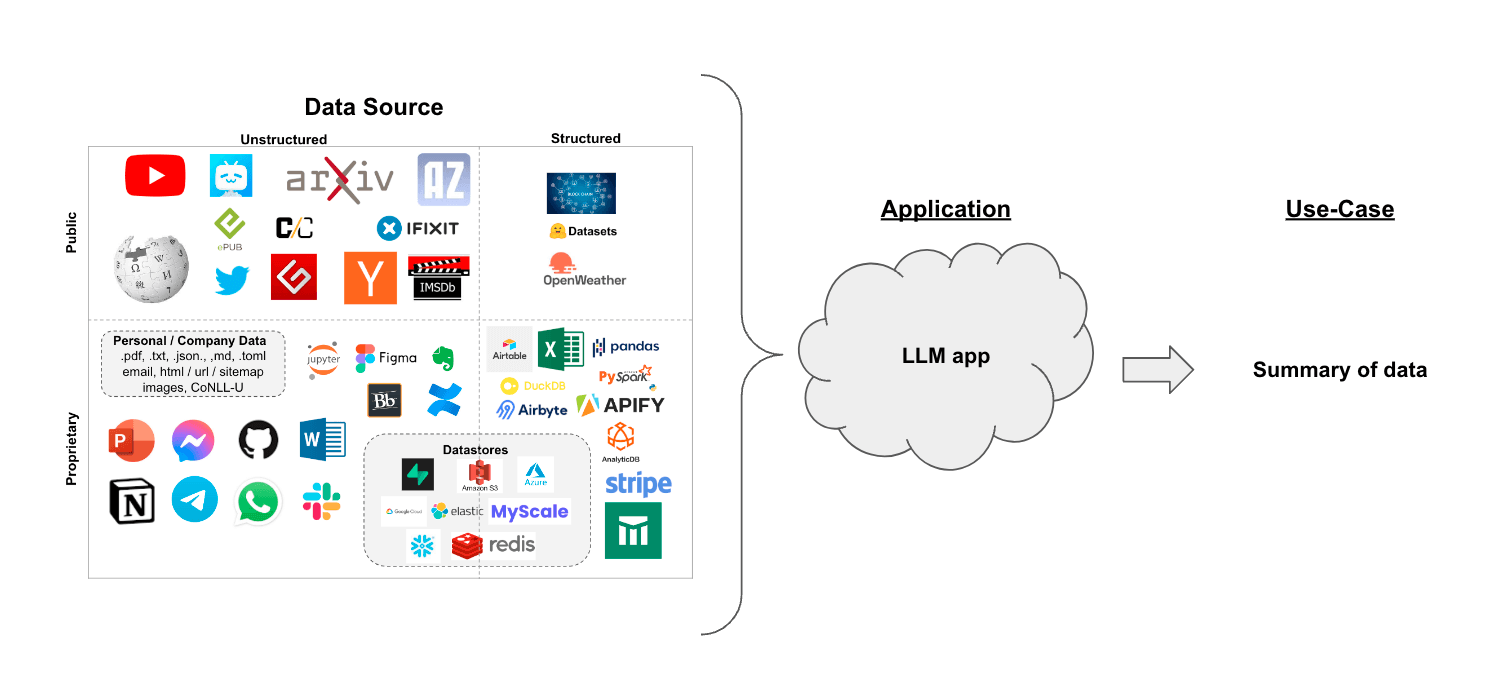

### Stuff Document Chain - Text Summarization

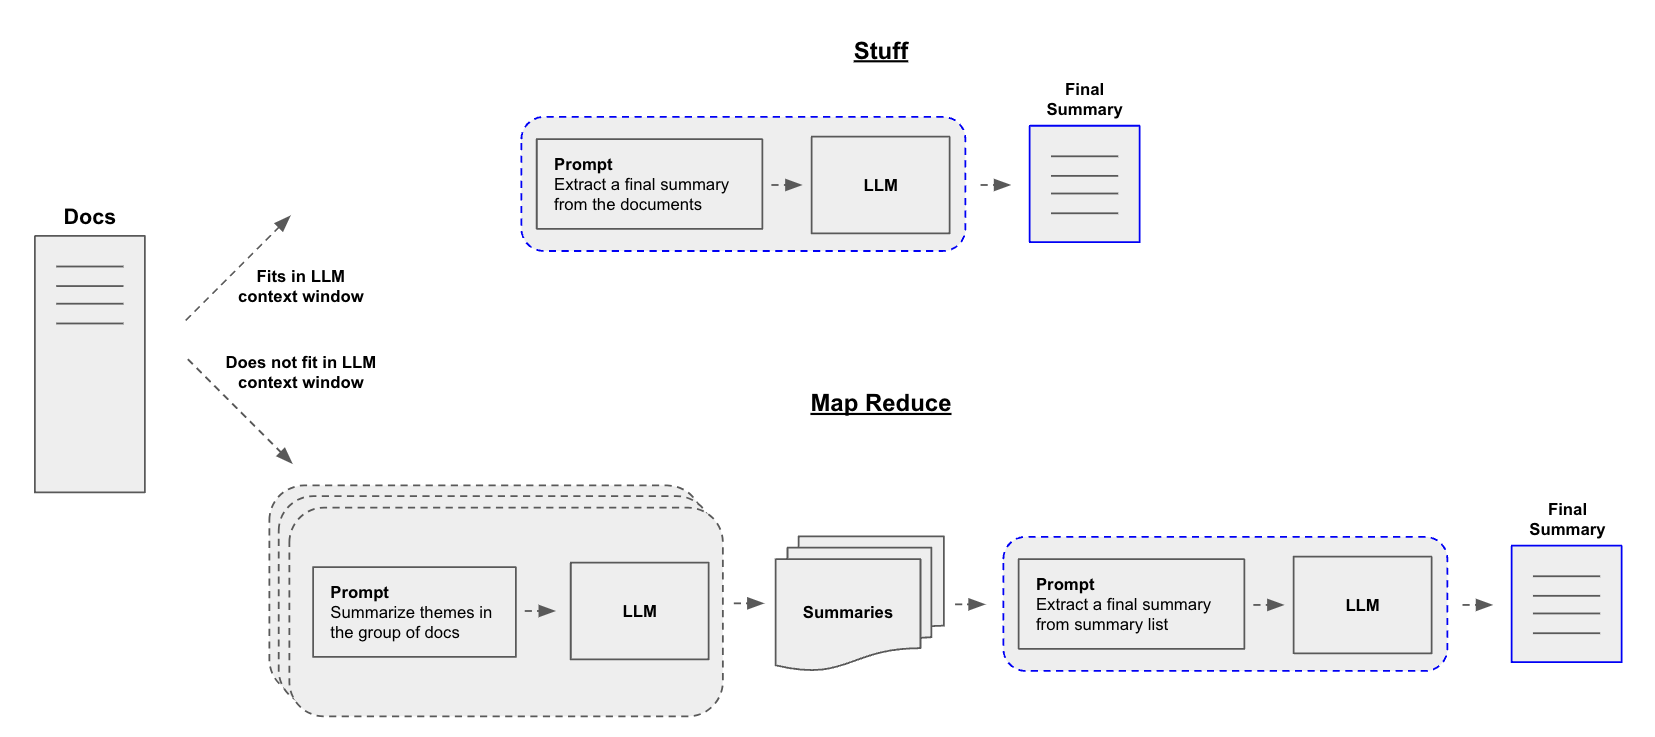

In [3]:
from langchain_groq import ChatGroq
from langchain_community.document_loaders import PyPDFLoader
import os
from dotenv import load_dotenv

load_dotenv()

groq_api_key = os.getenv('GROQ_API_KEY') # API Key

llm = ChatGroq(groq_api_key=groq_api_key, model_name='llama3-8b-8192')

load = PyPDFLoader('./data/apjspeech.pdf')
docs = load.load_and_split()
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': './data/apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the futur

In [4]:
from langchain import PromptTemplate

# Template
template = """
Write a concise and short summary of the following speech,
Speech: {text}
"""

prompt = PromptTemplate(input_variables=['text'], template=template)

### Chain.run
* Chain.run to start combine the doc 'page_content' into a one content
* And output_summary will get response

In [6]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm, chain_type='stuff', prompt=prompt, verbose=True)
output_summary = chain.run(docs)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3920\672837208.py:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output_summary = chain.run(docs)




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Write a concise and short summary of the following speech,
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online in